In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In order to simulate the projectile motion taking in account the air resistance as well (or the drag force) 

Note : time step (dt) would be used in order to get the status of the projectile at each instance.

np.arrange(start,step,stop) creates an array of evenly spaced values within that given interval. So this can be used while giving the simulation loop.

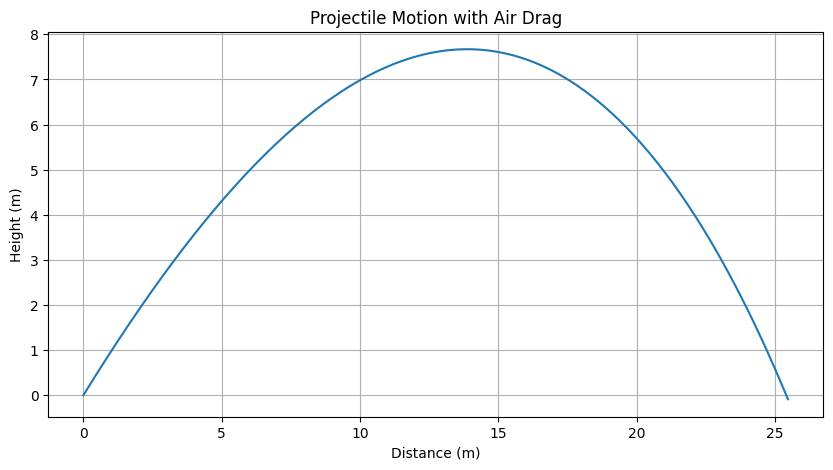

In [22]:
# Given Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
rho = 1.225  # Density of air (kg/m^3)
Cd = 0.47  # Drag coefficient (depending upon the material)
A = 0.01  # Cross-sectional area (m^2) of the object undergoing projectile motion
m = 0.14  # Mass of the projectile (kg)

# Initial conditions
angle = 45  # Launch angle in degrees
velocity = 20  # Initial velocity in m/s
theta = np.radians(angle)  # Convert angle to radians

# Time settings
dt = 0.01  # Time step (s)
t_max = 15  # Maximum time (s)

# Lists to store trajectory data
x, y = [0], [0]  # Initial positions
vx, vy = velocity * np.cos(theta), velocity * np.sin(theta)  # Initial velocities

# Simulation loop
for t in np.arange(0, t_max, dt):
    v = np.sqrt(vx**2 + vy**2)  # Current speed
    drag_force = 0.5 * Cd * A * rho * v**2  # Drag force magnitude

    # Update velocities with drag force
    ax = -drag_force * (vx / v) / m  # Acceleration in x direction
    ay = -g - (drag_force * (vy / v)) / m  # Acceleration in y direction

    vx += ax * dt  # Update x velocity
    vy += ay * dt  # Update y velocity

    x.append(x[-1] + vx * dt)  # Update x position
    y.append(y[-1] + vy * dt)  # Update y position

    if y[-1] < 0:  # Stop if projectile hits the ground
        break

# Plotting the trajectory
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.title('Projectile Motion with Air Drag')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.grid()

plt.show()